In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.pyplot import MultipleLocator 

In [2]:
df = pd.read_csv('D:\Code Library\FIN3080\Project 1\case 1\数据压缩包\PEPB.csv')
df

,Symbol,ym,PE,PB
0,1,2000-01,50.480628,9.661495
1,1,2000-02,51.794354,9.912929
2,1,2000-03,51.906161,9.934328
3,1,2000-04,52.828564,10.110866
4,1,2000-05,50.704241,9.704292
...,...,...,...,...
588718,688600,2022-02,46.873850,2.658256
588719,688600,2022-03,45.946735,2.605678
588720,688621,2022-01,76.652695,10.835170
588721,688621,2022-02,66.541657,9.405934


In [3]:
df['Symbol'] = df['Symbol'].astype(str)
df['judge'] = df['Symbol'].str.startswith('30') & (df['Symbol'].str.len() == 6)
df

,Symbol,ym,PE,PB,judge
0,1,2000-01,50.480628,9.661495,False
1,1,2000-02,51.794354,9.912929,False
2,1,2000-03,51.906161,9.934328,False
3,1,2000-04,52.828564,10.110866,False
4,1,2000-05,50.704241,9.704292,False
...,...,...,...,...,...
588718,688600,2022-02,46.873850,2.658256,False
588719,688600,2022-03,45.946735,2.605678,False
588720,688621,2022-01,76.652695,10.835170,False
588721,688621,2022-02,66.541657,9.405934,False


In [20]:
df1 = df[df.judge == True].reset_index(drop = True)
df1 = df1.groupby(['ym']).agg({'PE':'median','PB':'median'}).reset_index()
df1 = df1.rename(columns = {'PE':'PE_GEM','PB':'PB_GEM'})
df1

,ym,PE_GEM,PB_GEM
0,2009-10,73.379410,20.949571
1,2009-11,69.918615,19.291129
2,2009-12,75.415226,20.927425
3,2010-01,63.344913,5.411052
4,2010-02,59.970716,5.294925
...,...,...,...
145,2021-11,38.255111,4.063114
146,2021-12,40.155281,4.240403
147,2022-01,43.955599,4.850999
148,2022-02,41.583826,4.845685


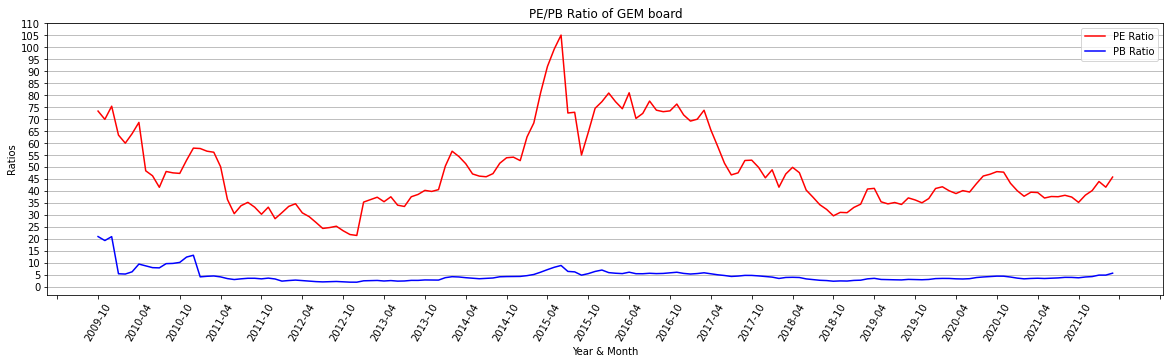

In [22]:
plt.figure(1,figsize=[20,5])
plt.plot(df1.ym, df1.PE_GEM, 'r', label = 'PE Ratio')
plt.plot(df1.ym, df1.PB_GEM, 'b', label = 'PB Ratio')
plt.title('PE/PB Ratio of GEM board')
plt.xlabel('Year & Month')
plt.ylabel('Ratios')
plt.xticks(rotation = 60)
x_major_locator = MultipleLocator(6)
y_major_locator = MultipleLocator(5)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.legend()
plt.grid(axis = 'y')
plt.show()

In [25]:
df2 = df[df.judge == False].reset_index(drop = True)
df2 = df2.groupby(['ym']).agg({'PE':'median','PB':'median'}).reset_index()
df2 = df2.rename(columns = {'PE':'PE_Main&SME','PB':'PB_Main&SME'})
df2

,ym,PE_Main&SME,PB_Main&SME
0,2000-01,42.034631,4.175017
1,2000-02,47.318469,4.590749
2,2000-03,50.745521,4.892081
3,2000-04,54.398509,5.216701
4,2000-05,51.907141,5.219386
...,...,...,...
262,2021-11,27.391666,2.386717
263,2021-12,28.589286,2.528068
264,2022-01,28.480650,3.661916
265,2022-02,28.048368,3.615311


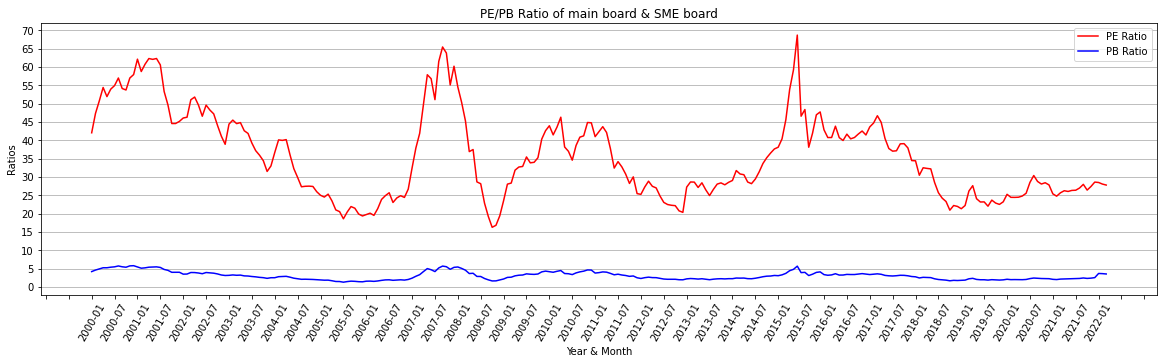

In [27]:
plt.figure(2,figsize=[20,5])
plt.plot(df2.ym, df2['PE_Main&SME'], 'r', label = 'PE Ratio')
plt.plot(df2.ym, df2['PB_Main&SME'], 'b', label = 'PB Ratio')
plt.title('PE/PB Ratio of main board & SME board')
plt.xlabel('Year & Month')
plt.ylabel('Ratios')
plt.xticks(rotation = 60)
x_major_locator = MultipleLocator(6)
y_major_locator = MultipleLocator(5)
ax=plt.gca()
ax.yaxis.set_major_locator(y_major_locator)
ax.xaxis.set_major_locator(x_major_locator)
plt.legend()
plt.grid(axis = 'y')
plt.show()

In [29]:
df3 = pd.merge(df1, df2, on = 'ym', how = 'outer')
df3 = df3.sort_values('ym')
df3

,ym,PE_GEM,PB_GEM,PE_Main&SME,PB_Main&SME
150,2000-01,NaN,NaN,42.034631,4.175017
151,2000-02,NaN,NaN,47.318469,4.590749
152,2000-03,NaN,NaN,50.745521,4.892081
153,2000-04,NaN,NaN,54.398509,5.216701
154,2000-05,NaN,NaN,51.907141,5.219386
...,...,...,...,...,...
145,2021-11,38.255111,4.063114,27.391666,2.386717
146,2021-12,40.155281,4.240403,28.589286,2.528068
147,2022-01,43.955599,4.850999,28.480650,3.661916
148,2022-02,41.583826,4.845685,28.048368,3.615311


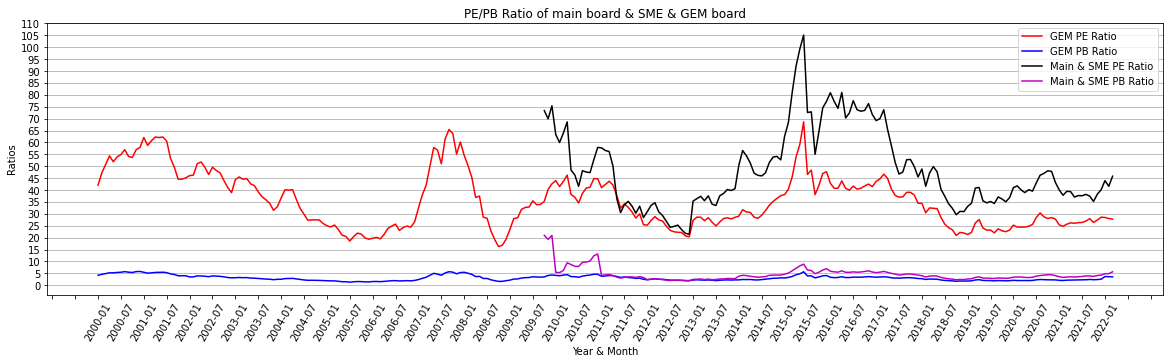

In [31]:
plt.figure(3,figsize=[20,5])
plt.plot(df3.ym, df3['PE_Main&SME'], 'r', label = 'GEM PE Ratio')
plt.plot(df3.ym, df3['PB_Main&SME'], 'b', label = 'GEM PB Ratio')
plt.plot(df3.ym,df3.PE_GEM, 'k', label = 'Main & SME PE Ratio')
plt.plot(df3.ym,df3.PB_GEM, 'm', label = 'Main & SME PB Ratio')
plt.title('PE/PB Ratio of main board & SME & GEM board')
plt.xlabel('Year & Month')
plt.ylabel('Ratios')
plt.xticks(rotation = 60)
x_major_locator = MultipleLocator(6)
y_major_locator = MultipleLocator(5)
ax=plt.gca()
ax.yaxis.set_major_locator(y_major_locator)
ax.xaxis.set_major_locator(x_major_locator)
plt.legend()
plt.grid(axis = 'y')
plt.show()